# Capstone - Satellite Data Monitoring forests
####  James Hoang

### Table of Contents
- Capstone Re-Introduction
- Additional Preprocessing
- Baseline Model (Carbon Emissions)
- Optimizations
- Baseline Model (Tree Density Loss)
- Optimizations
- Results

### Capstone Re-Introduction
Throughout the years we have been able to make technological advancements in order to monitor our global forests however, excessive use of these natural resources has posed the question of the health and impact on our planet. 

By using historical satellite data that monitors various changes in forests, this project aims to analyze forest changes primarily through carbon fluctuations along with tree cover density among different areas of the world. Many of these factors have been known to have a relationship with deforestation thus the project aims to identify patterns within this data and how well these variables perform in predictive power such that we can recognize areas most ideal for logging to reduce the harm to the environment. 

The goal is to develop a model that can predict potential areas at risk for deforestation based on carbon emissions and tree cover changes. The main data was retrieved from [Global Forest Watch](https://www.globalforestwatch.org/), a company that uses dashboards and interactive maps that take on real-time environmental data. data.

In [1916]:
# Python Version used 3.12.4
!python --version

Python 3.12.4


In [1918]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

import joblib

In [1920]:
pd.set_option('display.max_columns', None)

In [1922]:
C_data = pd.read_csv('binarized_carbon_data.csv')
C_data.shape

(1888, 266)

In [1924]:
C_data.head()

,canopy_density_threshold_2000,forested_area_2000,carbon_stored_per_country_2000_mg,avg_carbon_stored_per_ha_2000,gross_carbon_emissions,gross_carbon_removed,net_carbon_emissions,carbon_emissions_2001,carbon_emissions_2002,carbon_emissions_2003,carbon_emissions_2004,carbon_emissions_2005,carbon_emissions_2006,carbon_emissions_2007,carbon_emissions_2008,carbon_emissions_2009,carbon_emissions_2010,carbon_emissions_2011,carbon_emissions_2012,carbon_emissions_2013,carbon_emissions_2014,carbon_emissions_2015,carbon_emissions_2016,carbon_emissions_2017,carbon_emissions_2018,carbon_emissions_2019,carbon_emissions_2020,carbon_emissions_2021,carbon_emissions_2022,carbon_emissions_2023,country_Afghanistan,country_Akrotiri and Dhekelia,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,"country_Bonaire, Sint Eustatius and Saba",country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Caspian Sea,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Clipperton Island,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cuba,country_Curaçao,country_Cyprus,country_Czech Republic,country_Côte d'Ivoire,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Southern Territories,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Macedonia,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mayotte,country_Mexico,country_Micronesia,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norfolk Island,country_North Korea,country_Northern Cyprus,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Palestina,country_Panama,country_Papua New Guinea,country_Paracel Islands,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Congo,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Saint-Barthélemy,country_Saint-Martin,country_San Marino,country_Saudi Arabia,country

In [1926]:
T_data = pd.read_csv('binarized_tree_data.csv')
T_data.shape

(1888, 264)

### Additional Preprocessing

In [1929]:
# Get dense carbon emissions
dense_C_data = C_data[C_data['canopy_density_threshold_2000'] >= 30]
dense_C_data.reset_index(drop=True, inplace=True)
dense_C_data.head()

,canopy_density_threshold_2000,forested_area_2000,carbon_stored_per_country_2000_mg,avg_carbon_stored_per_ha_2000,gross_carbon_emissions,gross_carbon_removed,net_carbon_emissions,carbon_emissions_2001,carbon_emissions_2002,carbon_emissions_2003,carbon_emissions_2004,carbon_emissions_2005,carbon_emissions_2006,carbon_emissions_2007,carbon_emissions_2008,carbon_emissions_2009,carbon_emissions_2010,carbon_emissions_2011,carbon_emissions_2012,carbon_emissions_2013,carbon_emissions_2014,carbon_emissions_2015,carbon_emissions_2016,carbon_emissions_2017,carbon_emissions_2018,carbon_emissions_2019,carbon_emissions_2020,carbon_emissions_2021,carbon_emissions_2022,carbon_emissions_2023,country_Afghanistan,country_Akrotiri and Dhekelia,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,"country_Bonaire, Sint Eustatius and Saba",country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Caspian Sea,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Clipperton Island,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cuba,country_Curaçao,country_Cyprus,country_Czech Republic,country_Côte d'Ivoire,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Southern Territories,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Macedonia,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mayotte,country_Mexico,country_Micronesia,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norfolk Island,country_North Korea,country_Northern Cyprus,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Palestina,country_Panama,country_Papua New Guinea,country_Paracel Islands,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Congo,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Saint-Barthélemy,country_Saint-Martin,country_San Marino,country_Saudi Arabia,country

In [1931]:
# Get dense forests
dense_forests = T_data[T_data['threshold'] >= 30]
dense_forests.reset_index(drop=True, inplace=True)
dense_forests.head()

,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,tc_loss_ha_2006,tc_loss_ha_2007,tc_loss_ha_2008,tc_loss_ha_2009,tc_loss_ha_2010,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,country_Afghanistan,country_Akrotiri and Dhekelia,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,"country_Bonaire, Sint Eustatius and Saba",country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Caspian Sea,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Clipperton Island,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cuba,country_Curaçao,country_Cyprus,country_Czech Republic,country_Côte d'Ivoire,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Southern Territories,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Macedonia,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mayotte,country_Mexico,country_Micronesia,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norfolk Island,country_North Korea,country_Northern Cyprus,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Palestina,country_Panama,country_Papua New Guinea,country_Paracel Islands,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Congo,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Saint-Barthélemy,country_Saint-Martin,country_San Marino,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spai

Going back to our problem space andstatement, and given what we understand so far within the research and data limitations/conflicts, we can focus on forest with thresholds that are 30 and higher. This is because the idea of being able to deliver value is more highlighted through the ecological and environmental importance of denser forests which also are predominately found within the key countries. The loss and emissions within these countries would be considered more impactful for economic and ecological value while also potentially having more accurate estimates due to less noise in the data

## Carbon Emissions Model

### Baseline Model - Linear Regression

In [1936]:
# Defining features & target for carbon data
# Exclude 'avg_carbon_stored_per_ha_2000', 'forested_area_2000', 'canopy_density_threshold_2000'
X = dense_C_data[[ 'carbon_stored_per_country_2000_mg'
          , 'gross_carbon_emissions', 'gross_carbon_removed', 'carbon_emissions_2001', 'carbon_emissions_2002'
          , 'carbon_emissions_2003', 'carbon_emissions_2004', 'carbon_emissions_2005', 'carbon_emissions_2006', 'carbon_emissions_2007'
          , 'carbon_emissions_2008', 'carbon_emissions_2009', 'carbon_emissions_2010', 'carbon_emissions_2011', 'carbon_emissions_2012'
          , 'carbon_emissions_2013', 'carbon_emissions_2014', 'carbon_emissions_2015', 'carbon_emissions_2016', 'carbon_emissions_2017'
          , 'carbon_emissions_2018', 'carbon_emissions_2019', 'carbon_emissions_2020', 'carbon_emissions_2021', 'carbon_emissions_2022'
          , 'carbon_emissions_2023', 'country_Brazil', 'country_Russia', 'country_Canada', 'country_Indonesia', 'country_United States'
          , 'country_China', 'country_Australia', 'country_Democratic Republic of the Congo']]

y = dense_C_data['net_carbon_emissions']

In [1938]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Instantiate and fit a linear regression model
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

# Predictions for train and test
y_train_pred = lmodel.predict(X_train)
y_test_pred = lmodel.predict(X_test)

In [1940]:
# Evaluation Metrics
mean2_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mean2_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Mean squared error {mean2_train}, Training R squared: {r2_train}")
print(f"Test Mean squared error: {mean2_test}, Test R squared: {r2_test}")

Training Mean squared error 0.1347689916750086, Training R squared: 1.0
Test Mean squared error: 0.2221723116478671, Test R squared: 1.0


In [1942]:
print(y.describe())

count    7.080000e+02
mean    -1.613124e+07
std      8.957820e+07
min     -1.401115e+09
25%     -9.998164e+06
50%     -4.391820e+05
75%     -5.302500e+03
max      3.944834e+08
Name: net_carbon_emissions, dtype: float64


**Analysis**: A mean squared of 1.0 is concerning and is likely due to overfitting and is apparent by the significantly low mean squared error.

This model is performing suspiciously well so lets add some optimizations to the linear model with a lasso regression model instead.

## Optimizations

### Final Model - Lasso Regression

After doing some further testing, it also showed that the additional feature of forested_area_2000 contributed to better model performance as well as excluding key countries as the additional preprocessing prepared the data to be able to represent all country data for dense forests from forested areas so we will include this in our next step **Here is the final model and the following code after are optimizations performed**

In [1949]:
# Defining features & target for carbon data
# Exclude 'avg_carbon_stored_per_ha_2000', 'canopy_density_threshold_2000' and country dummy variables
# Include 'forested_area_2000'
X = dense_C_data[['carbon_stored_per_country_2000_mg', 'forested_area_2000'
          , 'carbon_emissions_2001', 'carbon_emissions_2002'
          , 'carbon_emissions_2003', 'carbon_emissions_2004', 'carbon_emissions_2005', 'carbon_emissions_2006', 'carbon_emissions_2007'
          , 'carbon_emissions_2008', 'carbon_emissions_2009', 'carbon_emissions_2010', 'carbon_emissions_2011', 'carbon_emissions_2012'
          , 'carbon_emissions_2013', 'carbon_emissions_2014', 'carbon_emissions_2015', 'carbon_emissions_2016', 'carbon_emissions_2017'
          , 'carbon_emissions_2018', 'carbon_emissions_2019', 'carbon_emissions_2020', 'carbon_emissions_2021', 'carbon_emissions_2022'
          , 'carbon_emissions_2023']]

y = dense_C_data['net_carbon_emissions']

In [1951]:
# Fit the Model with optimizations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=6)  # Optimize with PCA and use 3 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Instantiate and fit a Lasso regression model
lasso_model = Lasso(alpha=0.01, max_iter=250)
lasso_model.fit(X_train_pca, y_train)

# Predictions for train and test sets
y_train_pred = lasso_model.predict(X_train_pca)
y_test_pred = lasso_model.predict(X_test_pca)

In [1953]:
# Evaluation Metrics
mean2_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mean2_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {mean2_train}, Test Mean Squared Error: {mean2_test}")
print(f"Training Mean Absolute Error: {mae_train}, Test Mean Absolute Error: {mae_test}")
print(f"Training R squared: {r2_train}, Test R squared: {r2_test}")

Training Mean Squared Error: 514330353222724.5, Test Mean Squared Error: 755079738056135.4
Training Mean Absolute Error: 11210518.066962423, Test Mean Absolute Error: 11302994.738010673
Training R squared: 0.9418836501938275, Test R squared: 0.8380766448594654


**Model Performance**: 83.80%

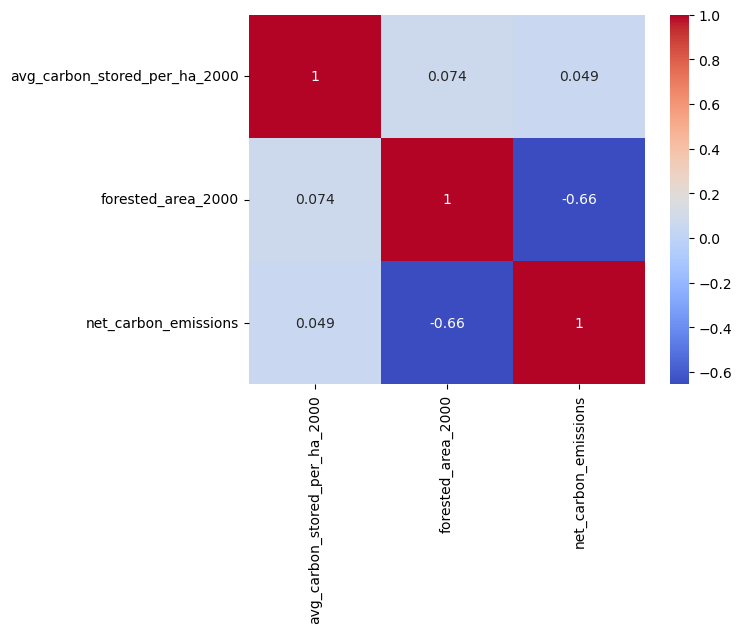

In [1956]:
matrix = dense_C_data[['avg_carbon_stored_per_ha_2000', 'forested_area_2000', 'net_carbon_emissions']].corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

We can include forested_area_2000 to represent country data of dense forests

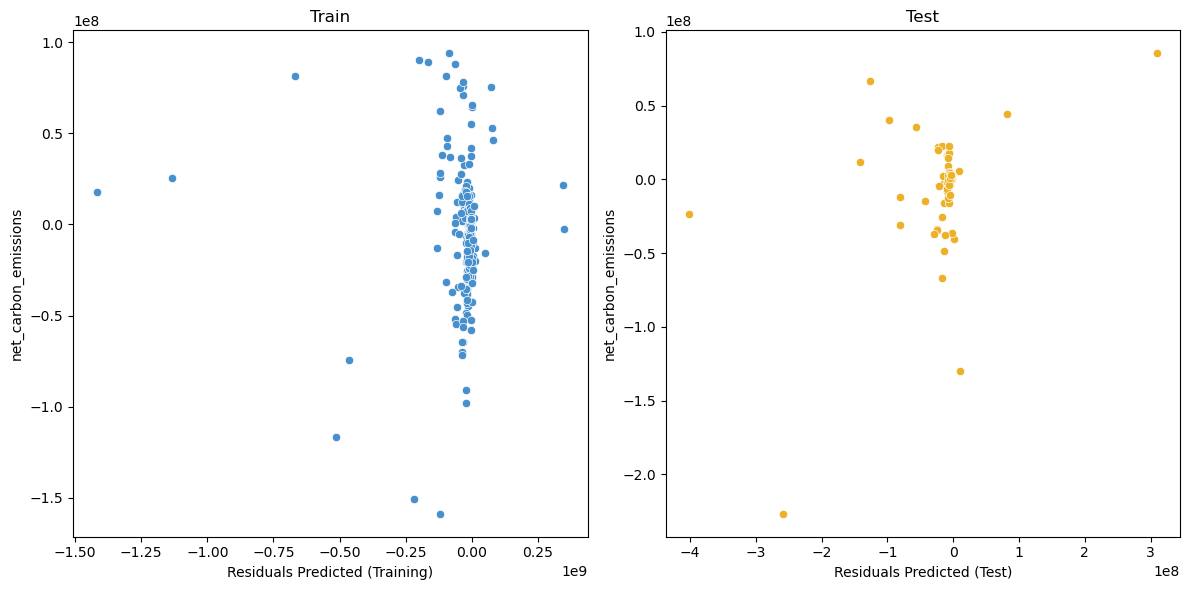

In [1959]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=residuals_train, color='#488fce')
plt.title('Train')
plt.xlabel('Residuals Predicted (Training)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=residuals_test, color='#edb128')
plt.title('Test')
plt.xlabel('Residuals Predicted (Test)')

plt.tight_layout()
plt.show()

We can see majority of data points falling within 0 residuals which is a good sign however a couple outliers exist which is presumed to be the large spikes within the carbon emissions dataset making it difficult for the model to recognize

In [1962]:
pca.fit(X_scaled)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance

array([0.92267665, 0.95882158, 0.97536154, 0.98553729, 0.99260803,
       0.99565069])

In [1964]:
len(cumulative_variance) + 1

7

Aiming for 6 components gives us 99.56% cumulative variance

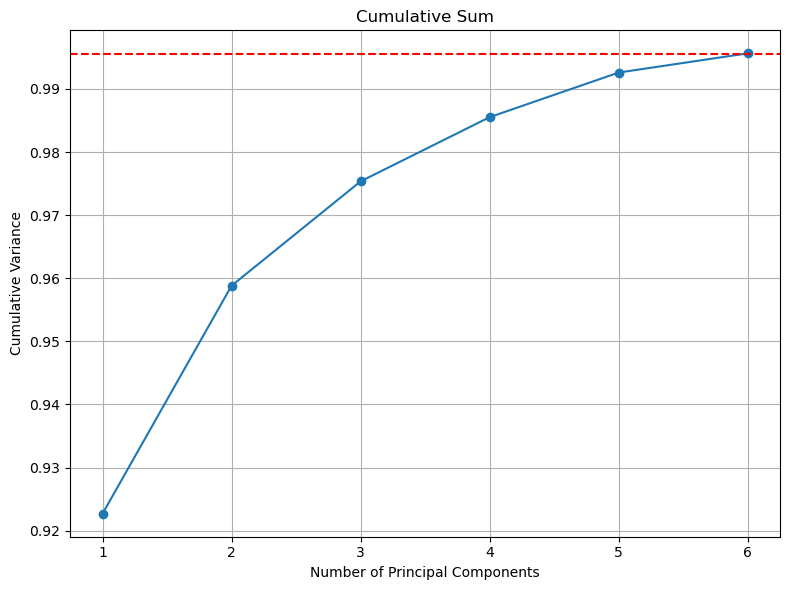

In [1967]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), cumulative_variance, marker='o')
plt.title('Cumulative Sum')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')

# 99.56% cumulative variance with 5 components
plt.axhline(0.9956, color='r', linestyle='--') 
plt.grid()
plt.tight_layout()
plt.show()

**Analysis**: From several iterations of cumsum, we can stick with PCA 6 as more PCA's results in only around 1% difference, we know that the yearly carbon emissions follow an upward trend so its understandable that the features can be reduced with few PCA's

In [1970]:
# hyper parameter tuning with GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100],
    'max_iter': [250, 500, 1000, 2500, 5000, 10000, 20000]
}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

best_alpha = grid_search.best_params_['alpha']
best_num_iters = grid_search.best_params_['max_iter']

print(f"Optimal alpha: {best_alpha}")
print(f"Optimal iter: {best_num_iters}")

Optimal alpha: 0.01
Optimal iter: 250


## Tree Density Model

Let's move onto the Tree Density Loss data and see how we can optimize this model

### Baseline Model - Linear Regression

In [1975]:
T_data.head(1)

,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,tc_loss_ha_2006,tc_loss_ha_2007,tc_loss_ha_2008,tc_loss_ha_2009,tc_loss_ha_2010,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,country_Afghanistan,country_Akrotiri and Dhekelia,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,"country_Bonaire, Sint Eustatius and Saba",country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Caspian Sea,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Clipperton Island,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cuba,country_Curaçao,country_Cyprus,country_Czech Republic,country_Côte d'Ivoire,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Southern Territories,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Macedonia,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mayotte,country_Mexico,country_Micronesia,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norfolk Island,country_North Korea,country_Northern Cyprus,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Palestina,country_Panama,country_Papua New Guinea,country_Paracel Islands,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Congo,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Saint-Barthélemy,country_Saint-Martin,country_San Marino,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spai

In [1977]:
# Defining features & target for carbon data
# Exclude 'threshold',
X2 = T_data[['area_ha', 'extent_2000_ha',
          'extent_2010_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002'
          , 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007'
          , 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012'
          , 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017'
          , 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022'
          , 'tc_loss_ha_2023']]

y2 = T_data['gain_2000-2020_ha']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=2)

# Instantiate and fit a linear regression model
lmodel2 = LinearRegression()
lmodel2.fit(X_train2, y_train2)

# Predictions for train and test
y_train_pred2 = lmodel2.predict(X_train2)
y_test_pred2 = lmodel2.predict(X_test2)

# Evaluation Metrics
mean2_train2 = mean_squared_error(y_train2, y_train_pred2)
r2_train2 = r2_score(y_train2, y_train_pred2)

mean2_test2 = mean_squared_error(y_test2, y_test_pred2)
r2_test2 = r2_score(y_test2, y_test_pred2)

print(f"Training Mean squared error {mean2_train2}, Training R squared: {r2_train2}")
print(f"Test Mean squared error: {mean2_test2}, Test R squared: {r2_test2}")

Training Mean squared error 90557895796.30424, Training R squared: 0.9888024277367574
Test Mean squared error: 92072553948.17052, Test R squared: 0.9901387581143853


## Optimizations

### Final Model - Lasso Regression

In [1981]:
# Defining features & target for carbon data
# Exclude 'threshold','extent_2000_ha'
X2 = T_data[['area_ha', 
          'extent_2010_ha', 'tc_loss_ha_2001', 'tc_loss_ha_2002'
          , 'tc_loss_ha_2003', 'tc_loss_ha_2004', 'tc_loss_ha_2005', 'tc_loss_ha_2006', 'tc_loss_ha_2007'
          , 'tc_loss_ha_2008', 'tc_loss_ha_2009', 'tc_loss_ha_2010', 'tc_loss_ha_2011', 'tc_loss_ha_2012'
          , 'tc_loss_ha_2013', 'tc_loss_ha_2014', 'tc_loss_ha_2015', 'tc_loss_ha_2016', 'tc_loss_ha_2017'
          , 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2020', 'tc_loss_ha_2021', 'tc_loss_ha_2022'
          , 'tc_loss_ha_2023']]

y2 = T_data['gain_2000-2020_ha']

In [1983]:
# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=2)

# Scale features
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Apply PCA for dimensionality reduction
pca2 = PCA(n_components=8)  # Adjust components based on optimization needs
X_train_pca2 = pca2.fit_transform(X_train_scaled2)
X_test_pca2 = pca2.transform(X_test_scaled2)

# Instantiate and fit a Lasso regression model
lasso_model2 = Lasso(alpha=0.01, max_iter=250)
lasso_model2.fit(X_train_pca2, y_train2)

# Predictions for train and test sets
y_train_pred2 = lasso_model2.predict(X_train_pca2)
y_test_pred2 = lasso_model2.predict(X_test_pca2)

In [1985]:
# Evaluation Metrics
mean2_train2 = mean_squared_error(y_train2, y_train_pred2)
mae_train2 = mean_absolute_error(y_train2, y_train_pred2)
r2_train2 = r2_score(y_train2, y_train_pred2)

mean2_test2 = mean_squared_error(y_test2, y_test_pred2)
mae_test2 = mean_absolute_error(y_test2, y_test_pred2)
r2_test2 = r2_score(y_test2, y_test_pred2)

print(f"Training Mean Squared Error: {mean2_train2}, Test Mean Squared Error: {mean2_test2}")
print(f"Training Mean Absolute Error: {mae_train2}, Test Mean Absolute Error: {mae_test2}")
print(f"Training R squared: {r2_train2}, Test R squared: {r2_test2}")

Training Mean Squared Error: 331814282724.67175, Test Mean Squared Error: 203703783008.9278
Training Mean Absolute Error: 229838.65213154923, Test Mean Absolute Error: 215278.26480008315
Training R squared: 0.9589708398575981, Test R squared: 0.9781827244805594


**Model Performance**: 97.81%

In [1988]:
dense_forests.head(1)

,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,tc_loss_ha_2005,tc_loss_ha_2006,tc_loss_ha_2007,tc_loss_ha_2008,tc_loss_ha_2009,tc_loss_ha_2010,tc_loss_ha_2011,tc_loss_ha_2012,tc_loss_ha_2013,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023,country_Afghanistan,country_Akrotiri and Dhekelia,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Anguilla,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,"country_Bonaire, Sint Eustatius and Saba",country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Caspian Sea,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Clipperton Island,country_Colombia,country_Comoros,country_Costa Rica,country_Croatia,country_Cuba,country_Curaçao,country_Cyprus,country_Czech Republic,country_Côte d'Ivoire,country_Democratic Republic of the Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Falkland Islands,country_Faroe Islands,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Southern Territories,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guatemala,country_Guernsey,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Isle of Man,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jersey,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kosovo,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Liechtenstein,country_Lithuania,country_Luxembourg,country_Macao,country_Macedonia,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mayotte,country_Mexico,country_Micronesia,country_Moldova,country_Monaco,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norfolk Island,country_North Korea,country_Northern Cyprus,country_Norway,country_Oman,country_Pakistan,country_Palau,country_Palestina,country_Panama,country_Papua New Guinea,country_Paracel Islands,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Congo,country_Reunion,country_Romania,country_Russia,country_Rwanda,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Saint-Barthélemy,country_Saint-Martin,country_San Marino,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Sint Maarten,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spai

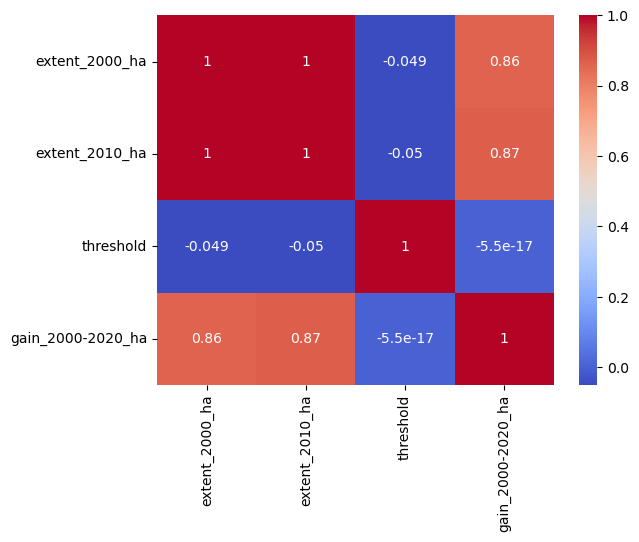

In [1990]:
matrix = dense_forests[['extent_2000_ha', 'extent_2010_ha', 'threshold', 'gain_2000-2020_ha']].corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

**Analysis**: It was expected that the threshold did not explain the target variable well which we can keep removed and can also remove one of the extent_[year]_ha. In this case I will remove 2000 relative to recent times -> the model from testing improved by 1%

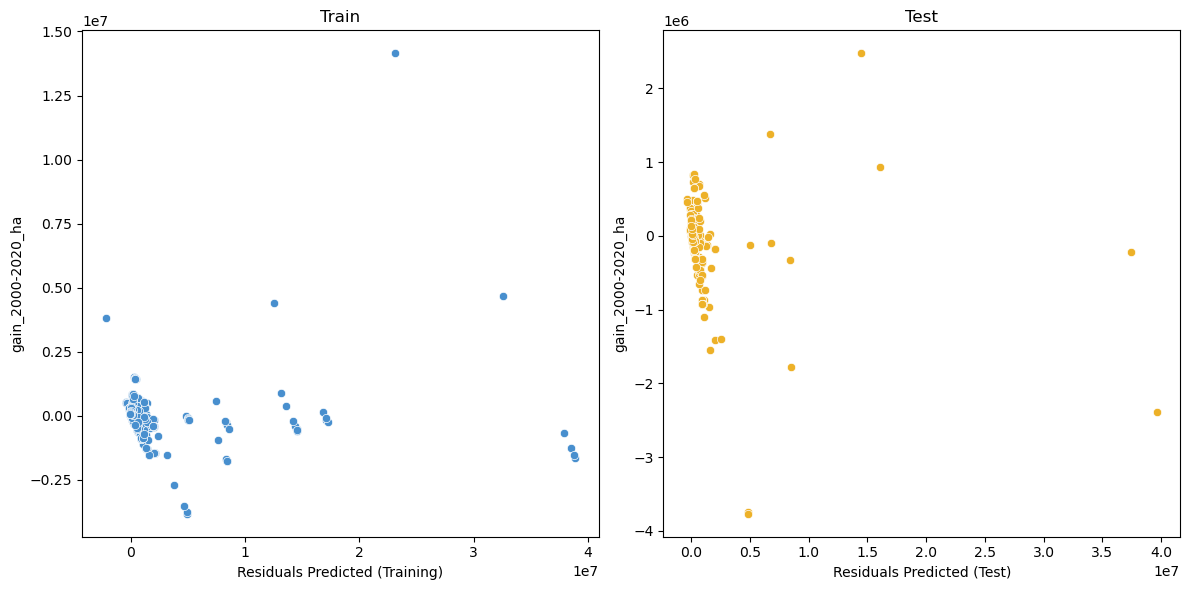

In [1993]:
residuals_train2 = y_train2 - y_train_pred2
residuals_test2 = y_test2 - y_test_pred2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred2, y=residuals_train2, color='#488fce')
plt.title('Train')
plt.xlabel('Residuals Predicted (Training)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred2, y=residuals_test2, color='#edb128')
plt.title('Test')
plt.xlabel('Residuals Predicted (Test)')

plt.tight_layout()
plt.show()

**Analysis**: The datapoints generall fall near 0 however there is a slight pattern happening in the training set which is not ideal

In [1996]:
X_scaled2 = scaler.fit_transform(X2)
pca2.fit(X_scaled2)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca2.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance

array([0.90876851, 0.94220573, 0.96104607, 0.97260108, 0.98280692,
       0.98898081, 0.99380672, 0.99585314])

In [1998]:
len(cumulative_variance) + 1

9

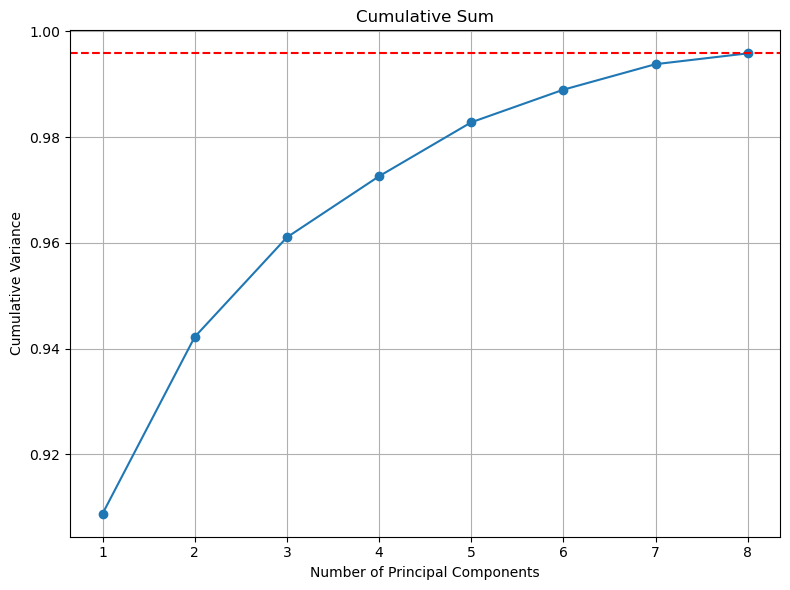

In [2000]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), cumulative_variance, marker='o')
plt.title('Cumulative Sum')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')

# 99.59% cumulative variance with 8 components
plt.axhline(0.9959, color='r', linestyle='--') 
plt.grid()
plt.tight_layout()
plt.show()

In [2002]:
# hyper parameter tuning with GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100],
    'max_iter': [250, 500, 1000, 2500, 5000, 10000, 20000]
}

grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca2, y_train2)

best_alpha = grid_search.best_params_['alpha']
best_num_iters = grid_search.best_params_['max_iter']

print(f"Optimal alpha: {best_alpha}")
print(f"Optimal iter: {best_num_iters}")

Optimal alpha: 0.01
Optimal iter: 250


In [2004]:
# Export the models
joblib.dump(lasso_model, 'carbon_model.pkl')

['carbon_model.pkl']

In [2006]:
joblib.dump(lasso_model2, 'tree_model2.pkl')

['tree_model2.pkl']

## Results
#### Overview
The models created focus on net carbon emissions as well as net tree density loss
#### Performance Evaluation
**Carbon Model**  <br>
MSE: 755,079,737,967,949.1 <br>
MAE: 11,302,994.74<br>
R-squared: 0.8381<br>

**Tree Model** <br>
MSE: 203,703,782,958.4 <br>
MAE: 215,278.26 <br>
R-squared: 0.9782 <br>